## Maximaxing Revenue For Taxi Cab Drivers through Payment Type Analysis

# Agenda

* Problem Statement
* Research Question
* Data Overview
* Methodology
* Analysis and Findings
* Hypothesis Testing
* Recommendations

# Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. 

Our goal is to use data-driven insights to `maximise revenue streams` for taxi drivers in order to meet this need.Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount..

# Research Question
#### Is there a relationship between total fare amount and payment type?
Can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

### Step 1. Importing necessary libraries

In [1]:
!pip install statsmodels


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Step 2. Loading the dataset

In [3]:
df = pd.read_parquet("yellow_tripdata_2020.parquet")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Columns Details

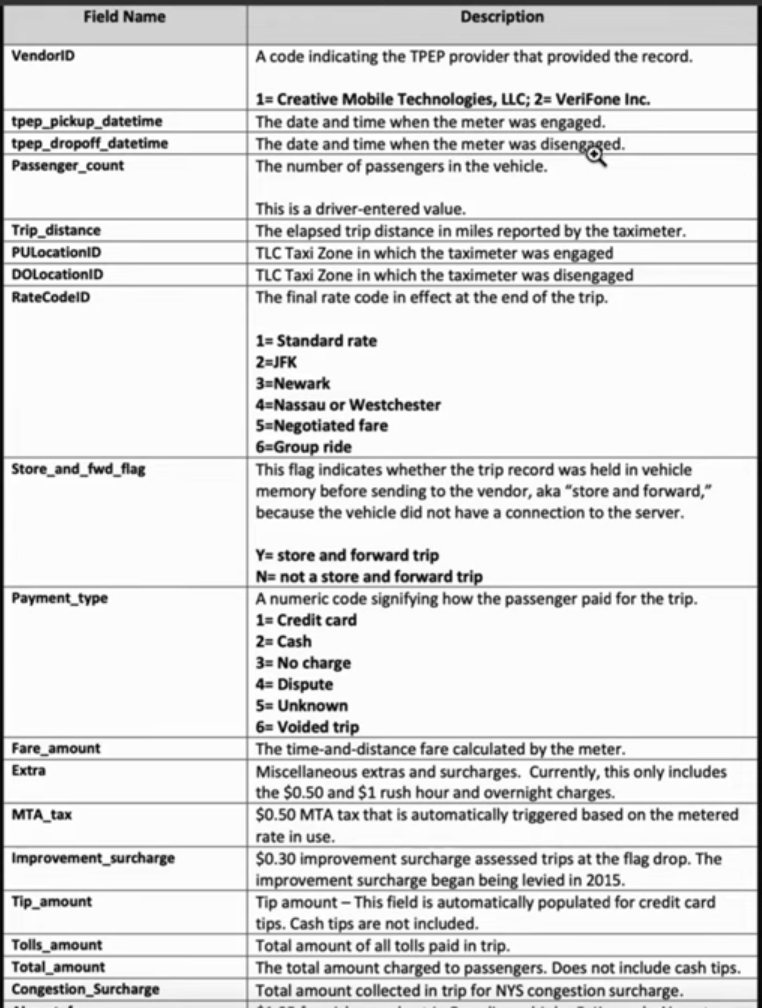

# Data Overview
For this analysis, we utilized the comprehensive dataset of NYC Taxi Trip records, used data cleaning and feature engineering procedures to concentrate solely on the relevant columns essential for our investigation.

#### Relevant columns used for this reseach:
* passenger_count (1 to 5)
* payment_type (card or cash)
* fare_amount
* trip_distance (miles)
* duration (minutes)
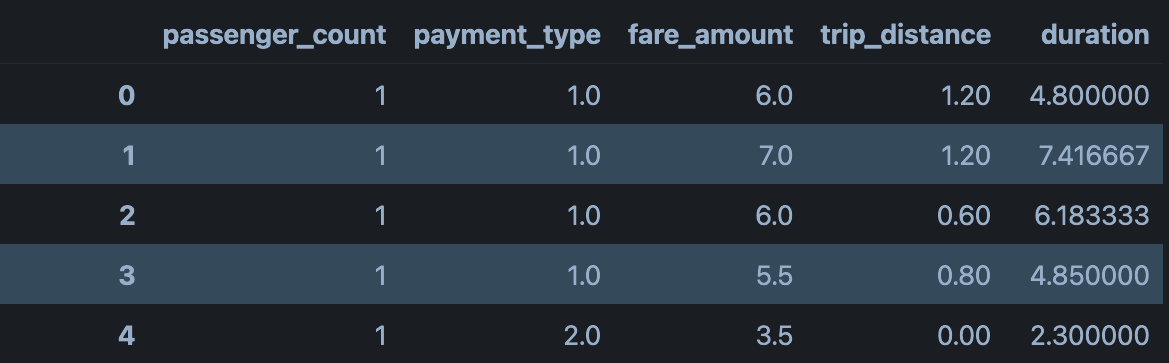


### Step 3. Exploratory Data Analysis

In [4]:
# This line retrieves the shape of the DataFrame and returns a tuple containing the number of rows and columns
df.shape

(6405008, 18)

In [5]:
# This line retrieves the data types of each column in the DataFrame
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
# Convert the "tpep_pickup_datetime" column to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Convert the "tpep_dropoff_datetime" column to datetime format
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])


In [7]:
# This line retrieves the data types of each column in the DataFrame
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
# Calculate the duration of each trip by subtracting pickup datetime from dropoff datetime
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Convert the duration from timedelta to minutes
df['duration'] = df['duration'].dt.total_seconds() / 60


In [9]:
# Select specific columns to keep in the DataFrame
df = df[["passenger_count", "payment_type", "fare_amount", "trip_distance", "duration"]]

In [10]:
# Check for missing values in each column and sum them up
null_counts = df.isnull().sum()

# Calculate the percentage of missing values in each column
null_percentage = (null_counts / len(df)) * 100


In [11]:
# Remove rows with missing values from the DataFrame
df.dropna(inplace=True)


In [12]:
# Convert the 'passenger_count' column to integer type
df['passenger_count'] = df['passenger_count'].astype('int64')

# Convert the 'payment_type' column to integer type
df['payment_type'] = df['payment_type'].astype('int64')


In [13]:
# Find duplicated rows in the DataFrame
df[df.duplicated()]


,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [14]:
# Remove duplicated rows from the DataFrame
df.drop_duplicates(inplace=True)


In [15]:
# Calculate the normalized value counts of passenger counts
df['passenger_count'].value_counts(normalize=True)


passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [16]:
# Filter rows where payment type is less than 3
df = df[df['payment_type'] < 3]

# Filter rows where passenger count is between 1 and 5
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]


In [17]:
# Replace values in the 'payment_type' column with 'card' for 1 and 'cash' for 2
df['payment_type'].replace([1, 2], ['card', 'cash'], inplace=True)


In [18]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [19]:
# Filter rows where fare amount is greater than 0
df = df[df['fare_amount'] > 0]

# Filter rows where trip distance is greater than 0
df = df[df['trip_distance'] > 0]

# Filter rows where duration is greater than 0
df = df[df['duration'] > 0]


In [20]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


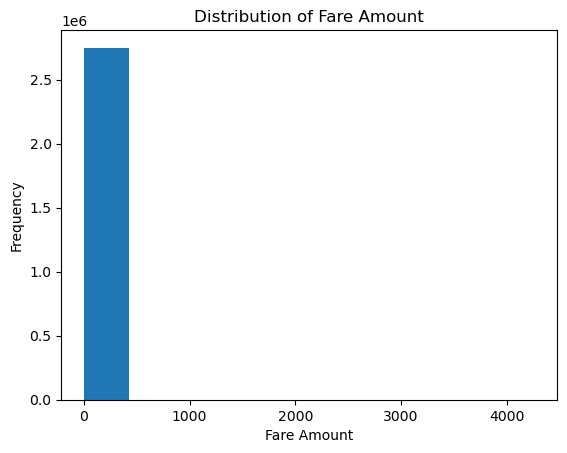

In [21]:
import matplotlib.pyplot as plt

# Plot histogram of 'fare_amount'
plt.hist(df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()


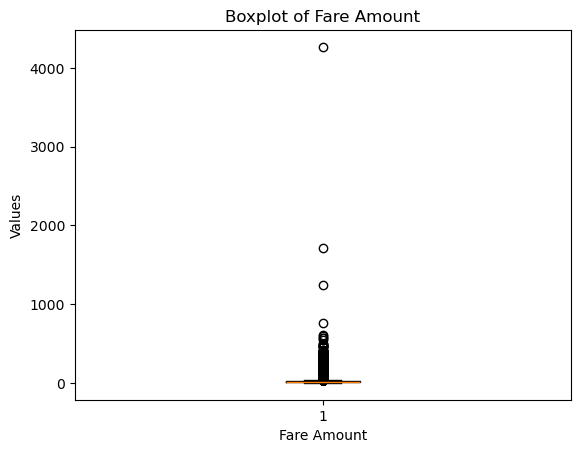

In [22]:
import matplotlib.pyplot as plt

# Create a boxplot of 'fare_amount'
plt.boxplot(df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Values')
plt.title('Boxplot of Fare Amount')
plt.show()


In [23]:
# Loop through specified columns
for col in ["fare_amount", "trip_distance", "duration"]:
    # Calculate the first quartile (Q1)
    q1 = df[col].quantile(0.25)
    # Calculate the third quartile (Q3)
    q3 = df[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = q3 - q1

    # Calculate lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter DataFrame to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [24]:
dfnew = df

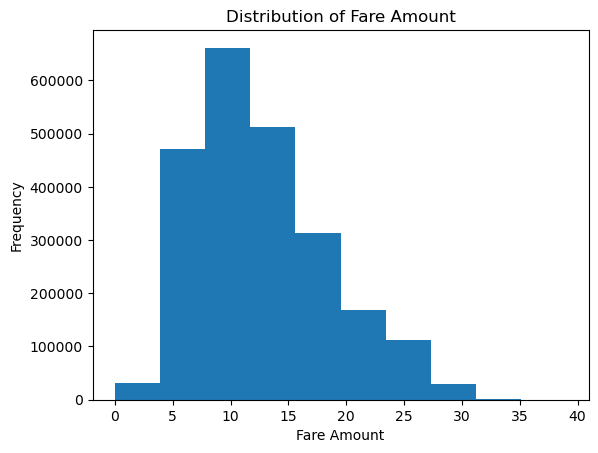

In [25]:
import matplotlib.pyplot as plt

# Plot histogram of 'fare_amount'
plt.hist(df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()


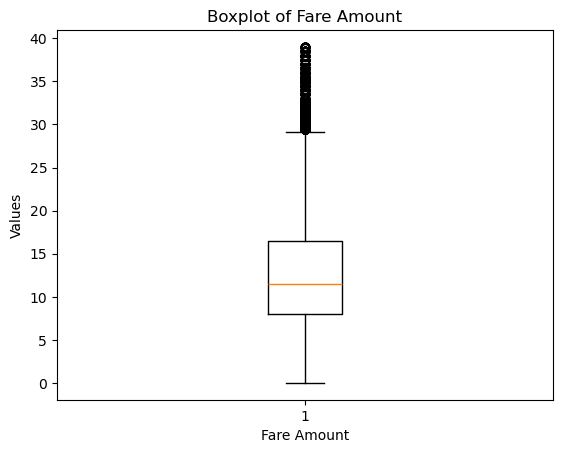

In [26]:
import matplotlib.pyplot as plt

# Create a boxplot of 'fare_amount'
plt.boxplot(df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Values')
plt.title('Boxplot of Fare Amount')
plt.show()


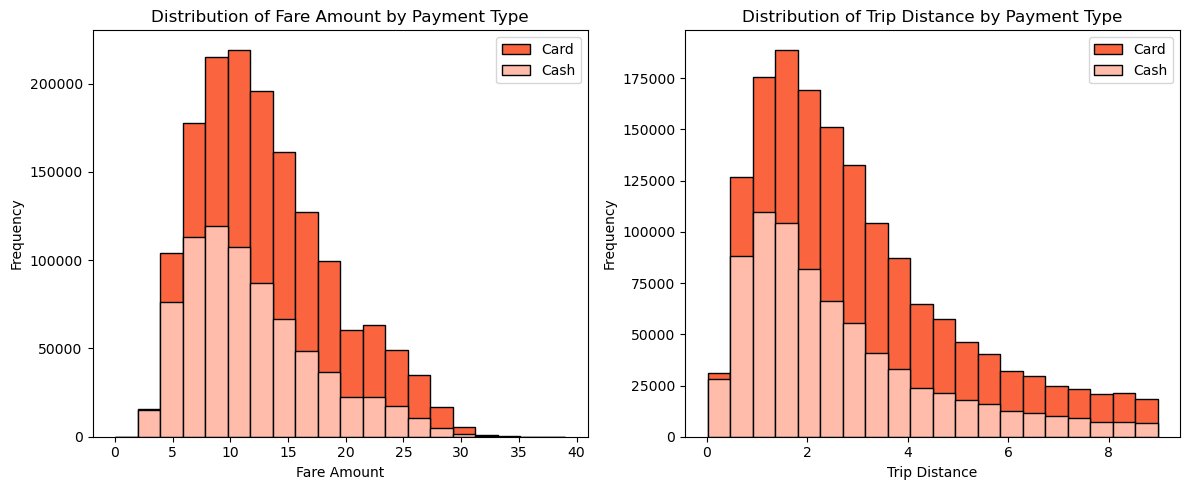

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Create the first subplot for the histogram of fare amount by payment type
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type'] == 'card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount by Payment Type')
plt.legend()

# Create the second subplot for the histogram of fare amount by trip distance
plt.subplot(1, 2, 2)
plt.hist(df[df['payment_type'] == 'card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance by Payment Type')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
# Group the DataFrame by 'payment_type' and calculate mean and standard deviation for 'fare_amount' and 'trip_distance'
agg_result = df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

# Display the aggregated results
print(agg_result)


             fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372


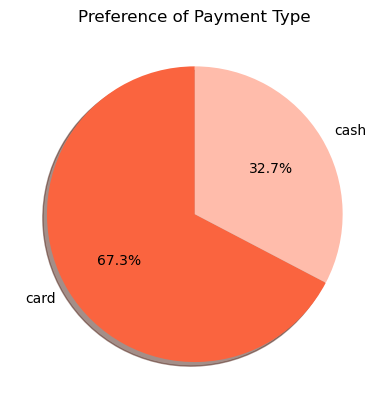

In [29]:
import matplotlib.pyplot as plt

# Title for the pie chart
plt.title('Preference of Payment Type')

# Pie chart showing the distribution of payment types
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index, 
        startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])

# Display the pie chart
plt.show()


# Passenger Count Analysis
* Among card payments, rides with a single passenger (passenger_count = 1) comprise the largest proportion, constituting 40.08% of all card transactions.
* Similarly, cash payments are predominantly associated with single-passenger rides, making up 20.04% of all cash transactions.
* There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that larger groups are less likely to use taxis or may opt for alternative payment methods.
* These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behavior and preferences.

In [30]:
# Group the DataFrame by 'payment_type' and 'passenger_count', and count the occurrences of each group
passenger_count = df.groupby(['payment_type', 'passenger_count'])['passenger_count'].count().reset_index(name='count')

# Calculate the percentage of each count relative to the total count for each payment type and passenger count combination
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100


In [31]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [32]:
import pandas as pd

# Create an empty DataFrame with specified column names
dfnew = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])

# Assign payment types to the 'payment_type' column
dfnew['payment_type'] = ['Card', 'Cash']

# Assign counts to corresponding passenger count columns for each payment type
# Assuming passenger counts range from 1 to 5
dfnew.iloc[0, 1:] = passenger_count.iloc[0:5, -1]  # Assign counts for 'Card' payment type
dfnew.iloc[1, 1:] = passenger_count.iloc[5:, -1]   # Assign counts for 'Cash' payment type

# Display the resulting DataFrame
dfnew


,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


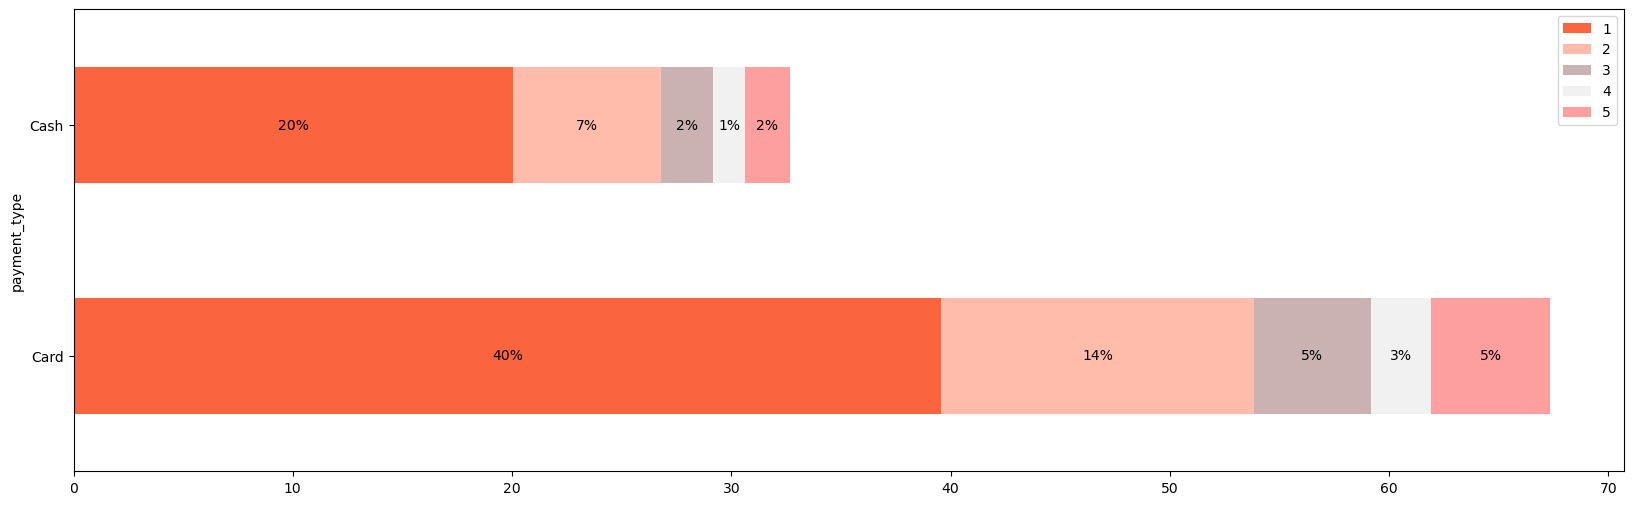

In [33]:
# Create a horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(20, 6))  # corrected function to create subplots

# Plot the DataFrame
dfnew.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax=ax)

# Add percentage text to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),  # Adjusted format string to display percentage
            horizontalalignment='center', verticalalignment='center')

# Show the plot
plt.show()


**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.
**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash

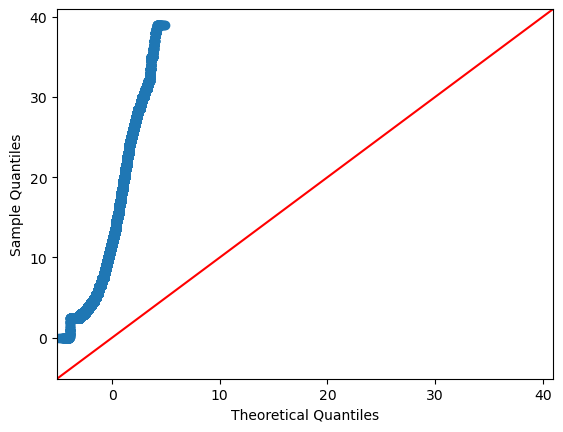

In [35]:
import statsmodels.api as sm

# Create QQ plot for 'fare_amount'
sm.qqplot(df['fare_amount'], line='45')
plt.show()

If you're obtaining NaN values for both the T statistic and p-value, it suggests that there might be an issue with the data you're passing into the t-test. Here are a few potential reasons for this:

1. **Data Cleaning**: Ensure that the 'fare_amount' column contains numerical data and that there are no missing or NaN values in either the 'Card' or 'Cash' payment type samples.

2. **Sample Size**: If one of the samples has very few data points, it may result in NaN values for the T statistic and p-value. Ensure that both samples have a sufficient number of data points for the t-test.

3. **Equal Variance Assumption**: The t-test assumes equal variances between the two groups unless specified otherwise. Setting `equal_var=False` in `st.ttest_ind()` accounts for unequal variances between the two groups. However, if the variance in one or both of the groups is close to zero, it might lead to NaN values. You can try performing the t-test with `equal_var=True` to see if it resolves the issue.

4. **Outliers**: Outliers in the data can also affect the results of the t-test. Consider inspecting and possibly removing outliers before conducting the t-test.

5. **Data Transformation**: If the data does not follow a normal distribution, it might lead to NaN values. Consider transforming the data or using non-parametric tests if the normality assumption is violated.

Double-check these aspects and see if any of them resolve the issue with obtaining NaN values for the T statistic and p-value. If the issue persists, further investigation into the data and the t-test parameters might be necessary.

In [36]:
import scipy.stats as st

# Extract fare amounts for Card and Cash payment types
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

# Perform independent samples t-test
t_stat, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)

# Print results
print('T statistic:', t_stat)
print('p-value:', p_value)


T statistic: nan
p-value: nan
